# RANDOM FOREST

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.metrics import accuracy_score

In [6]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [11, 5.5], 
          'axes.labelsize': 18,
          'axes.titlesize':20, 
          'font.size': 18,
          'legend.fontsize': 14, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12,
          'axes.axisbelow': True
         }

plt.rcParams.update(params)

### Abrindo o dataset de teste

In [7]:
dfTeste = pd.read_csv("datasets/dataset_teste.csv")

# SEPARANDO O DATASET QUE CONTEM APENAS OS AUDIOS ORIGINAIS
dfTeste   = dfTeste.loc[(dfTeste['ruido'] == 0) & (dfTeste['pitch'] == 0) & (dfTeste['tempo'] == 0) & (dfTeste['velocidade'] == 0)]

xTest   = dfTeste.iloc[:, 5:-1].to_numpy()
yTest   = dfTeste.iloc[:, -1].to_numpy()

### Setando os parâmetros iniciais

In [9]:
# NOME DO CLASSIFICADOR (APENAS PARA FINS DE NOMEACAO DE ARQUIVOS)
nomeClassificador = "RF"

# CAMINHO PROS DATASETS DE TREINAMENTO
diretorioDatasets = "datasets/"
datasets          = ["dataset_treinamento_original.csv", "dataset_treinamento_original_ruido.csv", "dataset_treinamento_original_pitch.csv", "dataset_treinamento_original_velocidade.csv", "dataset_treinamento_original_tempo.csv", "dataset_treinamento_completo.csv"]

# VAMOS FAZER UM BOOTSTRAP COM qtdIteracoesCV HOLDOUTS NO TESTE E UM KFOLD NO TREINAMENTO COM qtdIteracoesCV PASTAS
qtdIteracoesCV = 5

# PERCENTUAL DE DADOS DO DATASET DE TESTE PRA USAR EM CADA ITERACAO NA ETAPA DE TESTEEEE
percentualTeste = 2/3

# PARAMETROS PRA TESTAR NO GRIDSEARCH
parametrosGrid = [{
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1,2,3,4,5],
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2']
}]

# # RODAR AS LINHAS ABAIXO APENAS PARA TESTES RAPIDOS
# parametrosGrid = [{ # apenas testes rapidos
#     'n_estimators': [3], # apenas testes rapidos
# }] # apenas testes rapidos

### Fazendo o gridsearch pra cada dataset de treinamento

In [10]:
# ARRAYS DE RESULTADOS PARA CADA DATASET
arrayAcuraciaMediaTreinamentoCadaDataset = []
arrayDesvioPadraoTreinamentoCadaDataset  = [] 
arrayMelhorModeloTreinamentoCadaDataset  = []

# PRA CADA DATASET
for datasetAtual in datasets:
    
    # SEPARANDO DATA, TARGET E GRUPOS (grupos eh pras janelas de um mesmo audio sempre cairem na mesma pasta do kfold)
    dfTreinamento = pd.read_csv(diretorioDatasets+datasetAtual)
    data   = dfTreinamento.iloc[:, 5:-1].to_numpy()
    target = dfTreinamento.iloc[:, -1].to_numpy()
    groups = dfTreinamento.iloc[:, 0].to_numpy()
    
    # AJUSTANDO O GRIDSEARCH
    objGS = GridSearchCV(
        RandomForestClassifier(),
        parametrosGrid,
        verbose=10,
        cv=GroupKFold(n_splits=qtdIteracoesCV).split(data, target, groups),
        n_jobs=-1,
        scoring='accuracy'
    )
    
    # RODANDO O GRIDSEARCH
    objGS.fit(data, target)
    
    # OBTENDO OS RESULTADOS
    arrayAcuraciaMediaTreinamentoCadaDataset.append(objGS.cv_results_["mean_test_score"][objGS.best_index_])
    arrayDesvioPadraoTreinamentoCadaDataset.append(objGS.cv_results_["std_test_score"][objGS.best_index_])
    arrayMelhorModeloTreinamentoCadaDataset.append(objGS.best_estimator_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished


In [11]:
print("RESULTADOS DO GRIDSEARCH:\n\n\n")
for datasetAtual, melhorModelo, acuraciaMedia, desvPad in zip (datasets, arrayMelhorModeloTreinamentoCadaDataset, arrayAcuraciaMediaTreinamentoCadaDataset, arrayDesvioPadraoTreinamentoCadaDataset):
    print(datasetAtual)
    print(melhorModelo)
    print(acuraciaMedia, "+-", desvPad, "\n\n\n")

RESULTADOS DO GRIDSEARCH:



dataset_treinamento_original.csv
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7785996777501099 +- 0.0018309652848982338 



dataset_treinamento_original_ruido.csv
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=

### Testando o melhor modelo para cada dataset

In [12]:
arrayAcuraciaMediaTesteCadaDataset = []
arrayDesvioPadraoTesteCadaDataset   = []

for datasetAtual, melhorModelo in zip (datasets, arrayMelhorModeloTreinamentoCadaDataset):
    
    print("\nIniciando os testes com o", datasetAtual)
    
    # ABRINDO O DATASET DE TREINAMENTO E SEPARANDO X E Y
    dfTreinamento = pd.read_csv(diretorioDatasets+datasetAtual)
    xTrain = dfTreinamento.iloc[:, 5:-1].to_numpy()
    yTrain = dfTreinamento.iloc[:, -1].to_numpy()

    # CRIANDO OS ARRAY DE ACURACIAS QUE VAI GUARDAR CADA ACURACIA DO CROSS VALIDATION
    arrayAcuraciasDatasetAtual = []

    # ITERANDO O CROSS VALIDATION
    for i in range(1, qtdIteracoesCV + 1):

        # NOS JA TEMOS XTRAIN E YTRAIN, PRECISO DAR UM SHUFFLE NOS DADOS DE TESTE
        xTest, yTest = shuffle(xTest, yTest)
        xTestAtual = xTest[:int(percentualTeste*len(xTest))]
        yTestAtual = yTest[:int(percentualTeste*len(yTest))]

        # AJUSTANDO AS PARADAS DO MODELO ATUAL (SE DER PRA POR N_JOBS=-1 A GNT BOTA)
        modelozao = str(melhorModelo).replace("\n", "").replace(" ", "")
        parametrosModelo = modelozao.split(",")
        for j, parametroAtual in enumerate(parametrosModelo):
            if "n_jobs" in parametroAtual:
                parametrosModelo[j] = "n_jobs=-1"
        modelozao = ','.join(parametrosModelo)
        
        # CRIANDO, TREINANDO E PREDIZENDO O MODELO       
        objClassificador = eval(modelozao)
        objClassificador.fit(xTrain, yTrain)
        yPred  = objClassificador.predict(xTestAtual)
        arrayAcuraciasDatasetAtual.append(accuracy_score(yTestAtual, yPred))

        # PRINTANDO O PROGRESSO
        print(str(100*(i/qtdIteracoesCV))+"%", end=" ")
        
    # COLOCANDO OS RESULTADOS DESSE DATASET NOS ARRAYS CERTOS
    arrayAcuraciaMediaTesteCadaDataset.append(np.mean(arrayAcuraciasDatasetAtual))
    arrayDesvioPadraoTesteCadaDataset.append(np.std(arrayAcuraciasDatasetAtual))


Iniciando os testes com o dataset_treinamento_original.csv
50.0% 100.0% 
Iniciando os testes com o dataset_treinamento_original_ruido.csv
50.0% 100.0% 
Iniciando os testes com o dataset_treinamento_original_pitch.csv
50.0% 100.0% 
Iniciando os testes com o dataset_treinamento_original_velocidade.csv
50.0% 100.0% 
Iniciando os testes com o dataset_treinamento_original_tempo.csv
50.0% 100.0% 
Iniciando os testes com o dataset_treinamento_completo.csv
50.0% 100.0% 

In [13]:
print("RESULTADOS DO TESTE COM O MELHOR MODELO PARA CADA DATASET:\n\n\n")
for datasetAtual, melhorModelo, acuraciaMedia, desvPad in zip (datasets, arrayMelhorModeloTreinamentoCadaDataset, arrayAcuraciaMediaTesteCadaDataset, arrayDesvioPadraoTesteCadaDataset):
    print(datasetAtual)
    print(melhorModelo)
    print(acuraciaMedia, "+-", desvPad, "\n\n\n")

RESULTADOS DO TESTE COM O MELHOR MODELO PARA CADA DATASET:



dataset_treinamento_original.csv
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7493899463152758 +- 0.02171791117618349 



dataset_treinamento_original_ruido.csv
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_f

# Exibindo os resultados

### Resultado do treinamento (gridsearch)

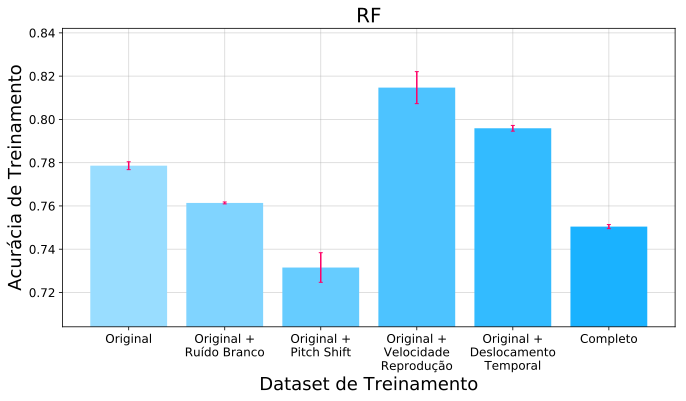

In [14]:
paleta = ["#99ddff", "#80d4ff", "#66ccff", "#4dc3ff", "#33bbff", "#1ab2ff"]
ticksDatasets = []

for i, (datasetAtual, acuraciaAtual, desvioAtual, corAtual) in enumerate(zip(datasets, arrayAcuraciaMediaTreinamentoCadaDataset, arrayDesvioPadraoTreinamentoCadaDataset, paleta)):
    
    plt.bar(i+1, acuraciaAtual, color=corAtual)
    plt.errorbar(i+1, acuraciaAtual, yerr=desvioAtual, capsize=2, color="#ff0066")
    
    if datasetAtual[:-4].split("_")[-1] == "ruido":
        ticksDatasets.append("Original +\nRuído Branco")
    elif datasetAtual[:-4].split("_")[-1] == "pitch":
        ticksDatasets.append("Original +\nPitch Shift")
    elif datasetAtual[:-4].split("_")[-1] == "velocidade":
        ticksDatasets.append("Original +\nVelocidade\nReprodução")
    elif datasetAtual[:-4].split("_")[-1] == "tempo":
        ticksDatasets.append("Original +\nDeslocamento\nTemporal")
    else:
        ticksDatasets.append(datasetAtual[:-4].split("_")[-1].capitalize())

plt.title(nomeClassificador)
plt.ylabel("Acurácia de Treinamento")
plt.xlabel("Dataset de Treinamento")
plt.ylim(min(arrayAcuraciaMediaTreinamentoCadaDataset)-max(arrayDesvioPadraoTreinamentoCadaDataset)-0.02, max(arrayAcuraciaMediaTreinamentoCadaDataset)+max(arrayDesvioPadraoTreinamentoCadaDataset)+0.02)
plt.xticks(range(1, len(ticksDatasets)+1), ticksDatasets)
plt.grid(alpha=0.5)

plt.savefig("resultados/"+nomeClassificador+"_Treinamento.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Resultado do teste

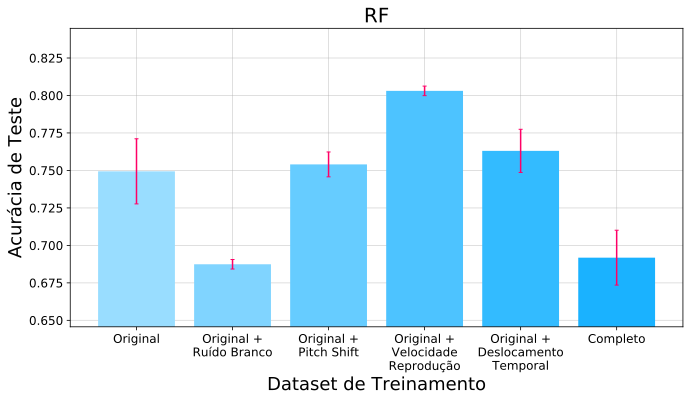

In [15]:
paleta = ["#99ddff", "#80d4ff", "#66ccff", "#4dc3ff", "#33bbff", "#1ab2ff"]
ticksDatasets = []

for i, (datasetAtual, acuraciaAtual, desvioAtual, corAtual) in enumerate(zip(datasets, arrayAcuraciaMediaTesteCadaDataset, arrayDesvioPadraoTesteCadaDataset, paleta)):
    
    plt.bar(i+1, acuraciaAtual, color=corAtual)
    plt.errorbar(i+1, acuraciaAtual, yerr=desvioAtual, capsize=2, color="#ff0066")
    
    if datasetAtual[:-4].split("_")[-1] == "ruido":
        ticksDatasets.append("Original +\nRuído Branco")
    elif datasetAtual[:-4].split("_")[-1] == "pitch":
        ticksDatasets.append("Original +\nPitch Shift")
    elif datasetAtual[:-4].split("_")[-1] == "velocidade":
        ticksDatasets.append("Original +\nVelocidade\nReprodução")
    elif datasetAtual[:-4].split("_")[-1] == "tempo":
        ticksDatasets.append("Original +\nDeslocamento\nTemporal")
    else:
        ticksDatasets.append(datasetAtual[:-4].split("_")[-1].capitalize())

plt.title(nomeClassificador)
plt.ylabel("Acurácia de Teste")
plt.xlabel("Dataset de Treinamento")
plt.ylim(min(arrayAcuraciaMediaTesteCadaDataset)-max(arrayDesvioPadraoTesteCadaDataset)-0.02, max(arrayAcuraciaMediaTesteCadaDataset)+max(arrayDesvioPadraoTesteCadaDataset)+0.02)
plt.xticks(range(1, len(ticksDatasets)+1), ticksDatasets)
plt.grid(alpha=0.5)

plt.savefig("resultados/"+nomeClassificador+"_Teste.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Juntando os dois gráficos

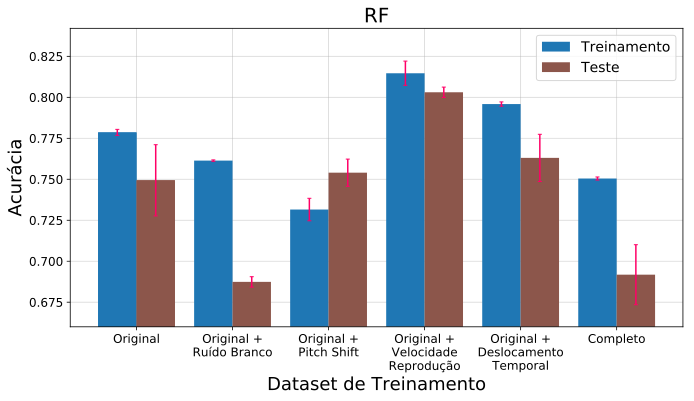

In [16]:
ticksDatasets = []

fatorMult = 2
fatorSoma = 0.4

for i, (datasetAtual, acuraciaTreinamento, desvioTreinamento, acuraciaTeste, desvioTeste) in enumerate(zip(datasets, arrayAcuraciaMediaTreinamentoCadaDataset, arrayDesvioPadraoTreinamentoCadaDataset, arrayAcuraciaMediaTesteCadaDataset, arrayDesvioPadraoTesteCadaDataset)):
    
    if i == 0: # COLOCAR A LEGENDA SO NO PRIMEIRO
        plt.bar(i*fatorMult-fatorSoma, acuraciaTreinamento, color="tab:blue", label="Treinamento")
        plt.bar(i*fatorMult+fatorSoma, acuraciaTeste, color="tab:brown", label="Teste")
    
    # TREINAMENTO
    plt.bar(i*fatorMult-fatorSoma, acuraciaTreinamento, color="tab:blue")
    plt.errorbar(i*fatorMult-fatorSoma, acuraciaTreinamento, yerr=desvioTreinamento, capsize=2, color="#ff0066")
    
    # TESTE
    plt.bar(i*fatorMult+fatorSoma, acuraciaTeste, color="tab:brown")
    plt.errorbar(i*fatorMult+fatorSoma, acuraciaTeste, yerr=desvioTeste, capsize=2, color="#ff0066")
    
    if datasetAtual[:-4].split("_")[-1] == "ruido":
        ticksDatasets.append("Original +\nRuído Branco")
    elif datasetAtual[:-4].split("_")[-1] == "pitch":
        ticksDatasets.append("Original +\nPitch Shift")
    elif datasetAtual[:-4].split("_")[-1] == "velocidade":
        ticksDatasets.append("Original +\nVelocidade\nReprodução")
    elif datasetAtual[:-4].split("_")[-1] == "tempo":
        ticksDatasets.append("Original +\nDeslocamento\nTemporal")
    else:
        ticksDatasets.append(datasetAtual[:-4].split("_")[-1].capitalize())

plt.title(nomeClassificador)
plt.legend()
plt.ylabel("Acurácia")
plt.xlabel("Dataset de Treinamento")
plt.ylim(min(arrayAcuraciaMediaTesteCadaDataset)-max(arrayDesvioPadraoTreinamentoCadaDataset)-0.02, max(arrayAcuraciaMediaTreinamentoCadaDataset)+max(arrayDesvioPadraoTreinamentoCadaDataset)+0.02)
plt.xticks(range(0, fatorMult*len(ticksDatasets), fatorMult), ticksDatasets)
plt.grid(alpha=0.5)

plt.savefig("resultados/"+nomeClassificador+"_Treinamento_Teste.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Salvando os resultados num txt

In [17]:
arquivoResultados = "resultados/" + nomeClassificador + "_Resultados.txt"

if os.path.exists(arquivoResultados):
    os.remove(arquivoResultados)

objFile = open(arquivoResultados, "a")

for nomeDataset, melhorModelo, acuraciaTreinamento, desvioTreinamento, acuraciaTeste, desvioTeste in zip(datasets, arrayMelhorModeloTreinamentoCadaDataset, arrayAcuraciaMediaTreinamentoCadaDataset, arrayDesvioPadraoTreinamentoCadaDataset, arrayAcuraciaMediaTesteCadaDataset, arrayDesvioPadraoTesteCadaDataset):
    string  = "DATASET: " + str(nomeDataset) + "\n"    
    string += "MELHOR MODELO (GRIDSEARCH): " + str(melhorModelo).replace("\n", "").replace(" ", "") + "\n"
    string += "ACURÁCIA DE TREINAMENTO: " + str(acuraciaTreinamento) + " +- " + str(desvioTreinamento) + "\n"
    string += "ACURÁCIA DE TESTE: " + str(acuraciaTeste) + " +- " + str(desvioTeste) + "\n\n\n\n"
    objFile.write(string)
    
objFile.close()    